In [ ]:
    ##SHORT VISUAL ANALYSIS
# Maximum city temperatures increase as city distances to the equator decrease, therefore cities are hotter near the equator
# There is no evident visual relationship and correlation between humidity and distance of cities to the equator
# There is no evident visual relationship and correlation between cloudiness and distance of cities to the equator
# There is no evident visual relationship and correlation between wind speed and distance of cities to the equator

In [6]:
import requests
import json
import csv

import random
import os
import numpy as np
import datetime
from random import randint
import pandas as pd
import matplotlib.pyplot as plt

from citipy import citipy

import openweathermapy.core as owm
#openweathermap api
from config import api_key


In [9]:

# def gencoordinates(m, n):
#     seen = set()

#     x, y = randint(m, n), randint(m, n)

#     while True:
#         seen.add((x, y))
#         yield (x, y)
#         x, y = randint(m, n), randint(m, n)
#         while (x, y) in seen:
#             x, y = randint(m, n), randint(m, n)

# g=gencoordinates(0,90)
# next(g)


#Form random sample of longitudes and latitudes
#to get a less biased sample, we use a clustering method and get our sample from the north and south hemispheres to ensure coordinates come from both hemispheres equally

#northern hemisphere long and lat ranges    
[n_lat_min,n_lat_max]=[0,90]
[n_lng_min,n_lng_max]=[-180,180]   

#list to hold north hemisphere coordinates
north_coords_lst=[]

for i in range(1,900): 
    x, y = randint(n_lat_min, n_lat_max), randint(n_lng_min, n_lng_max)
    north_coords=(x,y)
    north_coords_lst.append(north_coords)
# print(north_coords_lst)
len(north_coords_lst)

#south hemisphere long and lat ranges
[s_lat_min,s_lat_max]=[-90,0]
[s_lng_min,s_lng_max]=[-180,180]   

#south hemisphere long and lat ranges
south_coords_lst=[]

for i in range(1,900): 
    z, q = randint(s_lat_min, s_lat_max), randint(s_lng_min, s_lng_max)
    south_coords=(z,q)
    south_coords_lst.append(south_coords)
# print(south_coords_lst)
len(south_coords_lst)

#add up clusters of coordinates from northern and southern hemispheres to get all the coordinates of our sample
coords=north_coords_lst+south_coords_lst
len(coords)



1798

In [10]:
#use citipy to get nearest city names from the coordinate sample we got above
cities = []
for coordinate_pair in coords:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

names=[]
for city in cities:
    name = city.city_name
    names.append(name)
# print(names)

#remove all the duplicates in the list of our cities with function duplicate_remover
def duplicate_remover(lst):
    names_unique=[]

    for i in names:
        if i not in names_unique:
            names_unique.append(i)
    return(names_unique)



In [11]:
#get unique list of cities
cities_list=duplicate_remover(names)
# print(names_unique)

#number of unique sample of cities
len(cities_list)

#create a dataframe and form the columns needed to store data
df=pd.DataFrame(cities_list)
df=df.rename(columns={0:'Cities'})
df['Latitude']=''
df['Longitude']=""
df['Country']=''
df['Date']=''
df['Max Temperature (F)']=""
df['Humidity %']=""
df['Cloudiness %']=""
df['Wind Speed (mph)']=""

df.head()


,Cities,Latitude,Longitude,Country,Date,Max Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph)
0,fiche,,,,,,,,
1,vaitupu,,,,,,,,
2,sorvag,,,,,,,,
3,klaksvik,,,,,,,,
4,isiro,,,,,,,,


In [12]:
#make api calls to the openweathermap api for each of the cities in dataframe to get response urls and populate the dataframe with obtained data

for index, row in df.iterrows():

    base_url='api.openweathermap.org/data/2.5/weather?'
    apid='df02b3a219e4c4ec4f4c59ceae4cae72'
    city=row['Cities']
    unit='imperial'
    query_url=f'http://api.openweathermap.org/data/2.5/weather?q={city}&units={unit}&APPID={apid}'
    response=requests.get(query_url)
    weather_data=response.json()
    response.url
    
    try:
        
        df.loc[index,'Latitude']=weather_data['coord']['lat']
        df.loc[index,'Longitude']=weather_data['coord']['lon']
        df.loc[index,'Country']=weather_data['sys']['country']
        df.loc[index,'Date']=datetime.datetime.fromtimestamp(int(weather_data['dt'])).strftime('%Y-%m-%d %H:%M:%S')

        df.loc[index,'Max Temperature (F)']=weather_data['main']['temp_max']
        df.loc[index,'Humidity %']=weather_data['main']['humidity']
        df.loc[index,'Cloudiness %']=weather_data['clouds']['all']
        df.loc[index,'Wind Speed (mph)']=weather_data['wind']['speed']

    except (KeyError, IndexError):
        print("Missing field/NaN.")
    
    print(response.url)


http://api.openweathermap.org/data/2.5/weather?q=fiche&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
Missing field/NaN.
http://api.openweathermap.org/data/2.5/weather?q=vaitupu&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
Missing field/NaN.
http://api.openweathermap.org/data/2.5/weather?q=sorvag&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=klaksvik&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=isiro&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=kapaa&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=wahiawa&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=angul&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=dikson&units=imperial&APPID=df02b

http://api.openweathermap.org/data/2.5/weather?q=nanortalik&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
Missing field/NaN.
http://api.openweathermap.org/data/2.5/weather?q=barentsburg&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=yar-sale&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=hasaki&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=mezen&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=torbay&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=vila%20franca%20do%20campo&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=tura&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=yatou&units=imperial&APP

http://api.openweathermap.org/data/2.5/weather?q=rabo%20de%20peixe&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=pratapgarh&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=kralendijk&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=bria&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=sangar&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=ust-kuyga&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
Missing field/NaN.
http://api.openweathermap.org/data/2.5/weather?q=temaraia&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=makakilo%20city&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=alihe&units=imperial&

http://api.openweathermap.org/data/2.5/weather?q=medvedka&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=constitucion&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=yurga&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=srednekolymsk&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
Missing field/NaN.
http://api.openweathermap.org/data/2.5/weather?q=sinkat&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=beringovskiy&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=bereznik&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
Missing field/NaN.
http://api.openweathermap.org/data/2.5/weather?q=nykobing&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=misratah&

http://api.openweathermap.org/data/2.5/weather?q=ordu&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=manaure&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=san%20policarpo&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=krymsk&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=pevek&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
Missing field/NaN.
http://api.openweathermap.org/data/2.5/weather?q=liminangcong&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=hamilton&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=dingle&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=almazar&units=imperial&APPID=df02b3a2

http://api.openweathermap.org/data/2.5/weather?q=egvekinot&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=montego%20bay&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=jabinyanah&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=dandong&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=sharjah&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=tilichiki&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=sur&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=nioro&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=jalingo&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4

http://api.openweathermap.org/data/2.5/weather?q=zlobin&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=pravda&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=son%20la&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=vysokogornyy&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=kieta&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=alekseyevsk&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=hirado&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=qandala&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=eyl&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72


http://api.openweathermap.org/data/2.5/weather?q=cidreira&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
Missing field/NaN.
http://api.openweathermap.org/data/2.5/weather?q=asau&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=avera&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=hobart&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=laguna&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=port%20elizabeth&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=carnarvon&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
Missing field/NaN.
http://api.openweathermap.org/data/2.5/weather?q=umzimvubu&units=impe

http://api.openweathermap.org/data/2.5/weather?q=luderitz&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=makasar&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=kununurra&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=liwale&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=sao%20geraldo%20do%20araguaia&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=mufumbwe&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=sokoni&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
Missing field/NaN.
http://api.openweathermap.org/data/2.5/weather?q=dianopolis&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
Missing field/NaN.
http://api.openweathermap.org/data/2.5/weather?

http://api.openweathermap.org/data/2.5/weather?q=port%20augusta&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=francisco%20beltrao&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=vila&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=inongo&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=taguatinga&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=esperance&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=baturaja&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=benguela&units=imperial&APPID=df02b3a219e4c4ec4f4c59ceae4cae72
http://api.openweathermap.org/data/2.5/weather?q=kaeo&units=imperial&APPID=df02b3a219e4c4e

In [328]:
#sample structure of data for own use while writing above code
print(json.dumps(weather_data,indent=4, sort_keys=True))


{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -24.1,
        "lon": 25.03
    },
    "dt": 1528585013,
    "id": 933534,
    "main": {
        "grnd_level": 907.1,
        "humidity": 70,
        "pressure": 907.1,
        "sea_level": 1038.54,
        "temp": 39.65,
        "temp_max": 39.65,
        "temp_min": 39.65
    },
    "name": "Letlhakeng",
    "sys": {
        "country": "BW",
        "message": 0.0037,
        "sunrise": 1528520341,
        "sunset": 1528558772
    },
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 20.0004,
        "speed": 2.82
    }
}


In [13]:
df.head()

,Cities,Latitude,Longitude,Country,Date,Max Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph)
0,fiche,9.77,38.74,ET,2018-06-09 19:06:16,51.59,96,92,2.71
1,vaitupu,,,,,,,,
2,sorvag,,,,,,,,
3,klaksvik,62.23,-6.59,FO,2018-06-09 18:50:00,46.4,93,92,5.73
4,isiro,2.77,27.62,CD,2018-06-09 19:06:18,68.87,96,100,0.92


In [14]:
#count of empty rows in dataframe: cities that weren't found in openweathermap data
count=0
for index, row in df.iterrows():
    if df.loc[index,'Longitude']=="" and df.loc[index,'Max Temperature (F)']=="":
        count+=1
print(count)

74


In [15]:
#Total number of cities after removing unfound cities in original unique cities list
total_cities=len(df)-count
total_cities

609

In [16]:
#remove empty rows in dataframe
df = df[df.Country != '']

In [17]:
df

,Cities,Latitude,Longitude,Country,Date,Max Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph)
0,fiche,9.77,38.74,ET,2018-06-09 19:06:16,51.59,96,92,2.71
3,klaksvik,62.23,-6.59,FO,2018-06-09 18:50:00,46.4,93,92,5.73
4,isiro,2.77,27.62,CD,2018-06-09 19:06:18,68.87,96,100,0.92
5,kapaa,22.08,-159.32,US,2018-06-09 17:56:00,82.4,74,75,13.87
6,wahiawa,21.5,-158.02,US,2018-06-09 17:57:00,86,65,90,11.41
7,angul,20.84,85.1,IN,2018-06-09 19:06:19,80.21,96,68,7.63
8,dikson,73.51,80.55,RU,2018-06-09 19:06:19,32.06,100,92,14.79
9,nikel,69.41,30.21,NO,2018-06-09 18:50:00,41,75,88,6.93
10,ashqelon,31.67,34.57,IL,2018-06-09 18:20:00,71.6,83,40,3.36
11,bani walid,31.76,14,LY,2018-06-09 19:06:20,66.08,57,24,2.71


In [18]:
len(df)

609

In [19]:

#extract columns of data
temp=df.loc[:,['Max Temperature (F)']]
humidity=df.loc[:,['Humidity %']]
cloud=df.loc[:,['Cloudiness %']]
wind=df.loc[:,['Wind Speed (mph)']]
lat=df.loc[:,['Latitude']]

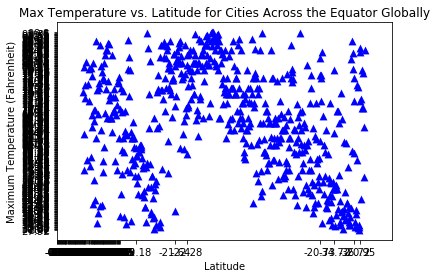

In [20]:
# Temperature (F) vs. Latitude


# plt.figure(figsize=(40, 38), dpi=80)
# plt.xticks(np.arange(-55, 80, step=5))
plt.scatter(lat,temp,marker='^',s=60,color='b',linewidth=0.05)
plt.xlim(xmax=650)
plt.xticks(np.arange(-55,78,1))

plt.title('Max Temperature vs. Latitude for Cities Across the Equator Globally')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (Fahrenheit)')

plt.show()



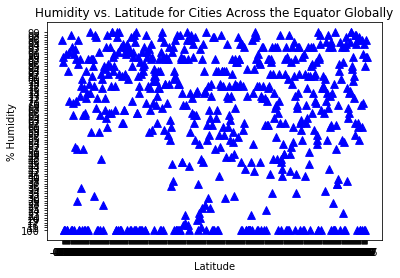

In [23]:
# Humidity (%) vs. Latitude

# plt.figure(figsize=(40, 38), dpi=80)
# plt.xticks(np.arange(-55, 80, step=5))
plt.scatter(lat,humidity,marker='^',s=60,color='b')
# plt.xlim(xmax=650)
# plt.xticks(np.arange(-56,79,10))

plt.title('Humidity vs. Latitude for Cities Across the Equator Globally')
plt.xlabel('Latitude')
plt.ylabel('% Humidity')

plt.show()


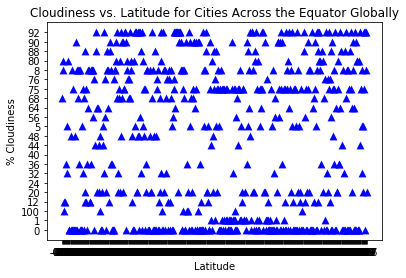

In [24]:
# Cloudiness (%) vs. Latitude

# plt.figure(figsize=(40, 38), dpi=80)
# plt.xticks(np.arange(-55, 80, step=5))
plt.scatter(lat,cloud,marker='^',s=60,color='b',linewidth=0.05)
# plt.xlim(xmax=650)
# plt.xticks(np.arange(-55,78,1))

plt.title('Cloudiness vs. Latitude for Cities Across the Equator Globally')
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')

plt.show()

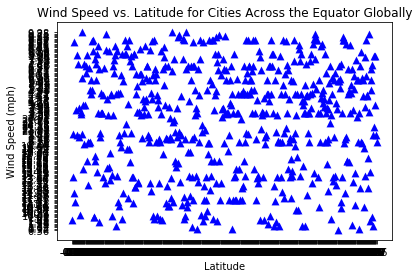

In [25]:
# Wind Speed (mph) vs. Latitude

# plt.figure(figsize=(40, 38), dpi=80)
# plt.xticks(np.arange(-55, 80, step=5))
plt.scatter(lat,wind,marker='^',s=60,color='b',linewidth=0.05)
# plt.xlim(xmax=650)
# plt.xticks(np.arange(-55,78,1))

plt.title('Wind Speed vs. Latitude for Cities Across the Equator Globally')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.show()


In [26]:
temp.max()

Max Temperature (F)    96.8
dtype: float64

In [27]:
temp.min()

Max Temperature (F)    27.92
dtype: float64

In [28]:
lat.max()

Latitude    78.22
dtype: float64

In [29]:
lat.min()

Latitude   -54.81
dtype: float64

In [30]:
humidity.max()

Humidity %    100.0
dtype: float64

In [31]:
humidity.min()

Humidity %    11.0
dtype: float64